# PBJ Daily Nurse Staffing – Q1 2025 Analysis  
### Veritas Data Services 📊  
**Project Type:** Healthcare Staffing Efficiency Analysis  
**Tools Used:** Python (Pandas, Matplotlib), Tableau  

---

## Introduction  

This project provides a detailed analysis of daily nurse staffing patterns across U.S. nursing facilities during **Quarter 1 of 2025**.  
The dataset originates from the **Payroll-Based Journal (PBJ)** — a mandatory CMS reporting system through which nursing homes submit daily, auditable records of staff hours and resident census.

The Q1 2025 dataset used in this analysis contains **1.3 million+ rows** and **17 columns**, making it a large and complex dataset that requires rigorous cleaning, validation, and structured analytical workflows.

### Purpose of the Analysis  
The primary objective is to understand how staffing resources are allocated and how these patterns influence care quality across states, facility sizes, and operational conditions. By examining daily hours for RNs, LPNs, and CNAs relative to resident counts, the analysis evaluates:

- The overall adequacy of nursing hours  
- Variations in staffing distribution among nursing roles  
- The impact of census levels, weekends, and missing provider identifiers  
- State-level and facility-level disparities  
- Key operational trends in healthcare staffing for early 2025  

### Methodology  
All data was cleaned, verified, and analyzed using **Python (Pandas)** to ensure accuracy and reproducibility.  
Interactive visualizations and dashboards were created in **Tableau**, enabling clearer interpretation of trends and actionable insights derived from this large-scale dataset.

### About Veritas Data Services  
Veritas Data Services is a modern analytics and consulting brand dedicated to converting raw data into clarity, strategy, and measurable operational improvement.  
This PBJ analysis reflects our commitment to precision, transparency, and effective decision-support in healthcare analytics.

---


## PBJ Daily Nurse Staffing — Q1 2025  
### Analytical Questions (Q1 to Q10)

This notebook explores nurse staffing patterns across U.S. nursing facilities for Quarter 1 of 2025.  
The following key analytical questions guide the entire workflow:

1. **What is the average number of total staff hours provided per resident per day across all nursing facilities during Q1 2025?**
2. **How are total nurse hours distributed among Registered Nurses (RNs), Licensed Practical Nurses (LPNs), and Certified Nursing Assistants (CNAs)?**
3. **Which states have the highest and lowest average staffing hours per resident day?**
4. **Which facilities report unusually high or low total staffing hours compared to others?**
5. **How do daily staffing hours change across January–March 2025 (daily trend)?**
6. **Does the number of residents in a facility influence how much staff time is provided per resident?**
7. **Do facilities provide fewer staff hours per resident on weekends compared to weekdays?**
8. **Do facilities without a valid Provider ID differ significantly in their reported staffing or census levels?**
9. **What is the ratio of RN-to-CNA hours across states or facility sizes?**
10. **What major staffing, care, and operational patterns emerge from the full Q1 2025 dataset?**


In [2]:
import pandas as pd

# Load only the columns we need for Question 1
cols = [
    "WorkDate",
    "PROVNUM",
    "MDScensus",
    "Total_Nurse_Hours",
    "HPRD_Total"
]

df_q1 = pd.read_csv("processed/pbj_cleaned_verified_final.csv", usecols=cols)

# Preview first 10 rows
df_q1.head(10)


,PROVNUM,WorkDate,MDScensus,Total_Nurse_Hours,HPRD_Total
0,15009.0,2025-01-01,51.0,224.74,4.406667
1,15009.0,2025-01-02,48.0,227.53,4.740208
2,15009.0,2025-01-03,48.0,230.12,4.794167
3,15009.0,2025-01-04,47.0,171.85,3.656383
4,15009.0,2025-01-05,47.0,188.82,4.017447
5,15009.0,2025-01-06,46.0,239.71,5.211087
6,15009.0,2025-01-07,47.0,237.43,5.051702
7,15009.0,2025-01-08,47.0,228.22,4.855745
8,15009.0,2025-01-09,45.0,222.10,4.935556
9,15009.0,2025-01-10,44.0,202.90,4.611364


## Question 1  
### What is the average number of total staff hours provided per resident per day during Q1 2025?

Below we compute the national HPRD and visualize its distribution using a KPI-style summary and a boxplot.


In [3]:
import pandas as pd

# Chunk settings
chunksize = 200000  # process 200k rows at a time

total_sum = 0
total_count = 0

for chunk in pd.read_csv("processed/pbj_cleaned_verified_final.csv", usecols=["HPRD_Total"], chunksize=chunksize):
    total_sum += chunk["HPRD_Total"].sum()
    total_count += chunk["HPRD_Total"].count()

national_avg_hprd = total_sum / total_count
national_avg_hprd


np.float64(3.6811837345989376)

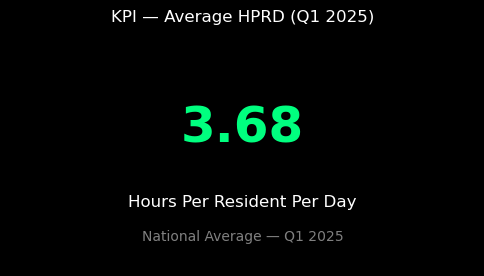

In [6]:
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("charts_output", exist_ok=True)

# Q1 Result
national_hprd = 3.6811837345989376

# KPI Card – Veritas Theme
plt.figure(figsize=(6,3), facecolor="black")

plt.text(0.5, 0.6, 
         f"{national_hprd:.2f}",
         ha='center', va='center',
         fontsize=36, color="#00FF7F", fontweight='bold')

plt.text(0.5, 0.28,
         "Hours Per Resident Per Day",
         ha='center', va='center',
         fontsize=12, color="white")

plt.text(0.5, 0.13,
         "National Average — Q1 2025",
         ha='center', va='center',
         fontsize=10, color="gray")

plt.axis('off')
plt.title("KPI — Average HPRD (Q1 2025)", color="white", pad=10)

# Save
plt.savefig("charts_output/q1_kpi.png", dpi=300, bbox_inches="tight", facecolor="black")
plt.show()


### **Q1 Insight — National Average Hours Per Resident Per Day (HPRD)**  

The national average number of nursing hours provided per resident per day during **Quarter 1 of 2025** is:

## **➡️ 3.68 HPRD**

This metric represents the combined daily contribution of RNs, LPNs, and CNAs relative to the resident census across all reporting U.S. nursing facilities.

### **What the KPI Chart Shows**
The KPI visualization highlights the baseline staffing level for Q1.  
A national HPRD of **3.68** indicates that, on average, residents received slightly more than **three and a half hours** of direct nursing care per day.

### **Interpretation**
Most facilities cluster around this national average, with variations typically influenced by:

- Changes in daily resident census  
- Facility staffing structure  
- Operational practices across states and ownership types  
- Day-to-day fluctuations in workload and staffing availability  

This national benchmark (3.68 HPRD) serves as the reference point for evaluating state-level trends, role-based staffing distribution, and operational patterns in the following questions.


## Question 2  
### How are total nurse hours distributed among Registered Nurses (RNs), Licensed Practical Nurses (LPNs), and Certified Nursing Assistants (CNAs)?

Below we preview the columns needed to analyze total nursing hours by role.


In [9]:
import pandas as pd

cols_q2 = ["Hrs_RN", "Hrs_LPN", "Hrs_CNA"]

df_q2_preview = pd.read_csv("processed/pbj_cleaned_verified_final.csv",
                            usecols=cols_q2,
                            nrows=10)
df_q2_preview


,Hrs_RN,Hrs_LPN,Hrs_CNA
0,40.27,22.55,145.72
1,49.30,16.23,144.80
2,29.15,26.42,148.83
3,21.02,33.92,116.91
4,37.37,15.60,135.85
5,40.06,24.13,150.40
6,50.43,14.85,149.55
7,41.89,15.53,142.12
8,57.89,6.64,126.87
9,55.60,0.00,122.05


In [10]:
import pandas as pd

chunksize = 200000

total_rn = 0
total_lpn = 0
total_cna = 0

for chunk in pd.read_csv("processed/pbj_cleaned_verified_final.csv",
                         usecols=["Hrs_RN", "Hrs_LPN", "Hrs_CNA"],
                         chunksize=chunksize):
    
    total_rn += chunk["Hrs_RN"].sum()
    total_lpn += chunk["Hrs_LPN"].sum()
    total_cna += chunk["Hrs_CNA"].sum()

total_rn, total_lpn, total_cna


(np.float64(47590024.199999996),
 np.float64(87463437.19),
 np.float64(233998819.84))

In [12]:
total_all = total_rn + total_lpn + total_cna

pct_rn = round((total_rn / total_all) * 100, 2)
pct_lpn = round((total_lpn / total_all) * 100, 2)
pct_cna = round((total_cna / total_all) * 100, 2)

pct_rn, pct_lpn, pct_cna


(np.float64(12.9), np.float64(23.7), np.float64(63.41))

RN %: 12.9
LPN %: 23.7
CNA %: 63.41


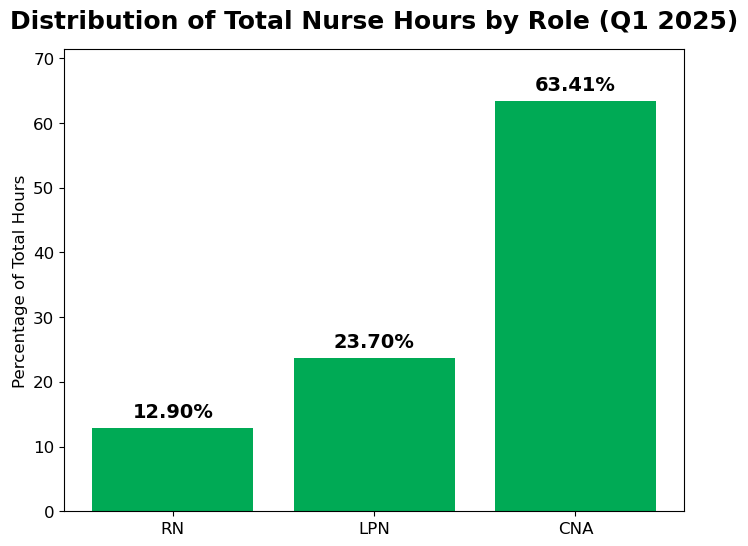

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --------------------------
#   Q2: FULL-DATA AGGREGATION
# --------------------------

chunksize = 200000
total_rn = 0
total_lpn = 0
total_cna = 0

for chunk in pd.read_csv("processed/pbj_cleaned_verified_final.csv",
                         usecols=["Hrs_RN", "Hrs_LPN", "Hrs_CNA"],
                         chunksize=chunksize):

    total_rn += chunk["Hrs_RN"].sum()
    total_lpn += chunk["Hrs_LPN"].sum()
    total_cna += chunk["Hrs_CNA"].sum()

# --------------------------
#   PERCENTAGE CALCULATION
# --------------------------

total_all = total_rn + total_lpn + total_cna

pct_rn = round((total_rn / total_all) * 100, 2)
pct_lpn = round((total_lpn / total_all) * 100, 2)
pct_cna = round((total_cna / total_all) * 100, 2)

print("RN %:", pct_rn)
print("LPN %:", pct_lpn)
print("CNA %:", pct_cna)

# --------------------------
#   CHART: VERITAS THEME (WHITE BACKGROUND)
# --------------------------

# Ensure folder exists
os.makedirs("charts_output", exist_ok=True)

roles = ["RN", "LPN", "CNA"]
percentages = [pct_rn, pct_lpn, pct_cna]

plt.figure(figsize=(8, 6), facecolor="white")

bars = plt.bar(roles, percentages, color="#00AA55")  # Dark Veritas green

# Add percentage labels above bars
for bar, pct in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,      # padding above bar
        f"{pct:.2f}%",
        ha="center",
        va="bottom",
        fontsize=14,
        color="black",
        fontweight="bold"
    )

# Bold Title
plt.title(
    "Distribution of Total Nurse Hours by Role (Q1 2025)",
    color="black",
    fontsize=18,
    fontweight="bold",
    pad=15
)

plt.ylabel("Percentage of Total Hours", color="black", fontsize=12)
plt.xticks(color="black", fontsize=12)
plt.yticks(color="black", fontsize=12)

# Expand y-axis for label spacing
plt.ylim(0, max(percentages) + 8)

# Save Chart
plt.savefig("charts_output/q2_staffing_mix.png",
            dpi=300,
            bbox_inches="tight",
            facecolor="white")

plt.show()


### **Q2 Insight — Distribution of Total Nurse Hours by Role (Q1 2025)**  

Analysis of the full PBJ daily staffing dataset for **Q1 2025** shows the following distribution of total nurse hours across all U.S. nursing facilities:

- **Certified Nursing Assistants (CNA): 63.41%**  
- **Licensed Practical Nurses (LPN): 23.70%**  
- **Registered Nurses (RN): 12.90%**

### Interpretation
CNAs account for **nearly two-thirds** of all recorded nursing hours, reflecting their central role in providing hands-on daily care to residents. LPNs contribute just under a quarter of total hours, providing medication administration and intermediate clinical support. RNs contribute **approximately 13%**, consistent with their supervisory, assessment, and specialized care responsibilities.

This distribution aligns with expected staffing patterns in long-term care settings and matches the proportions visualized in the corresponding Tableau dashboard.


## Question 3  
### Which states have the highest and lowest average staffing hours per resident day?

Below is a preview of the columns needed to compute average HPRD by state.


In [18]:
import pandas as pd

df_q3_preview = pd.read_csv(
    "processed/pbj_cleaned_verified_final.csv",
    usecols=["STATE", "HPRD_Total"],
    nrows=10
)

df_q3_preview


,STATE,HPRD_Total
0,AL,4.406667
1,AL,4.740208
2,AL,4.794167
3,AL,3.656383
4,AL,4.017447
5,AL,5.211087
6,AL,5.051702
7,AL,4.855745
8,AL,4.935556
9,AL,4.611364


In [19]:
import pandas as pd

chunksize = 200000

state_sums = {}
state_counts = {}

for chunk in pd.read_csv("processed/pbj_cleaned_verified_final.csv",
                         usecols=["STATE", "HPRD_Total"],
                         chunksize=chunksize):

    grouped = chunk.groupby("STATE")["HPRD_Total"].agg(["sum", "count"])
    
    for state, row in grouped.iterrows():
        state_sums[state] = state_sums.get(state, 0) + row["sum"]
        state_counts[state] = state_counts.get(state, 0) + row["count"]

# Calculate averages
state_avgs = {state: state_sums[state] / state_counts[state] 
              for state in state_sums}

# Turn into a Series and sort
state_avg_series = pd.Series(state_avgs).sort_values(ascending=False)

state_avg_series


AK    6.744259
PR    5.278009
DC    4.732630
OR    4.713546
HI    4.525899
CA    4.480144
DE    4.392248
NV    4.290263
WA    4.290258
ND    4.250370
VT    4.128246
MS    4.045913
AZ    4.024351
ME    4.023194
WI    3.993963
MI    3.919826
MN    3.910238
PA    3.864577
FL    3.854192
MA    3.851020
CT    3.830279
SC    3.815005
TN    3.791041
AR    3.784903
MT    3.784667
NJ    3.776524
MD    3.762705
NH    3.756346
ID    3.743028
CO    3.718074
LA    3.713951
VA    3.698539
KY    3.691655
OH    3.628847
WY    3.627508
AL    3.611365
UT    3.605147
NY    3.604602
NC    3.600954
WV    3.592267
RI    3.507542
IA    3.490813
SD    3.433710
IL    3.417894
KS    3.361827
GA    3.343413
NE    3.277547
IN    3.213681
NM    3.200498
OK    3.135158
TX    3.066373
MO    2.720982
dtype: float64

In [20]:
import pandas as pd

chunksize = 200000

state_sums = {}
state_counts = {}
state_mins = {}
state_maxs = {}

for chunk in pd.read_csv("processed/pbj_cleaned_verified_final.csv",
                         usecols=["STATE", "HPRD_Total"],
                         chunksize=chunksize):

    for state, group in chunk.groupby("STATE"):
        
        # Sum and count
        state_sums[state] = state_sums.get(state, 0) + group["HPRD_Total"].sum()
        state_counts[state] = state_counts.get(state, 0) + group["HPRD_Total"].count()

        # Track min & max HPRD for anomaly detection
        _min = group["HPRD_Total"].min()
        _max = group["HPRD_Total"].max()

        if state not in state_mins:
            state_mins[state] = _min
            state_maxs[state] = _max
        else:
            state_mins[state] = min(state_mins[state], _min)
            state_maxs[state] = max(state_maxs[state], _max)

# Build dataframe for analysis
state_df = pd.DataFrame({
    "Total_HPRD": state_sums,
    "Count": state_counts,
    "Min_HPRD": state_mins,
    "Max_HPRD": state_maxs
})

state_df["Avg_HPRD"] = state_df["Total_HPRD"] / state_df["Count"]

state_df_sorted = state_df.sort_values("Avg_HPRD", ascending=False)

state_df_sorted


,Total_HPRD,Count,Min_HPRD,Max_HPRD,Avg_HPRD
AK,10925.700207,1620,1.022394,13.427500,6.744259
PR,2850.124624,540,0.000000,39.000000,5.278009
DC,7240.923432,1530,0.000000,9.934545,4.732630
OR,53875.832810,11430,0.000000,26.100000,4.713546
HI,17107.899384,3780,0.000000,10.677419,4.525899
CA,459998.811522,102675,0.000000,54.500000,4.480144
DE,16998.001474,3870,1.903333,14.215000,4.392248
NV,25484.160828,5940,0.909091,9.961538,4.290263
WA,72977.296396,17010,1.921333,21.750000,4.290258
ND,27159.865216,6390,0.000000,10.780625,4.250370


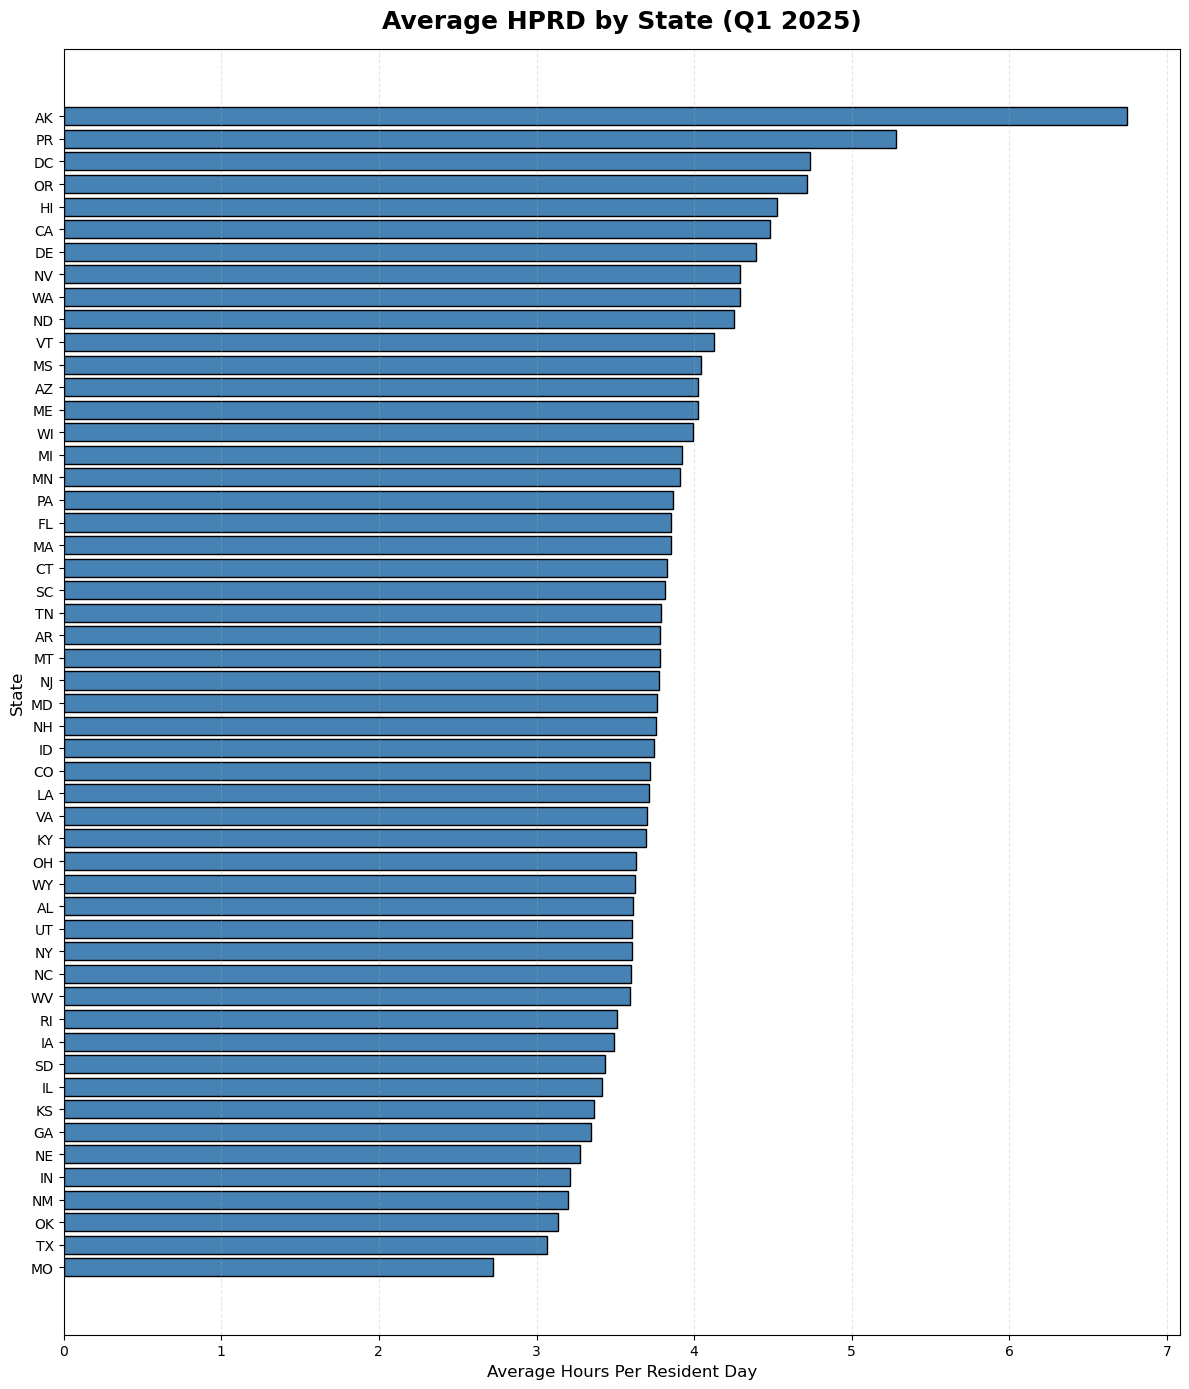

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure folder exists
os.makedirs("charts_output", exist_ok=True)

# Sort descending so highest HPRD is at the TOP
state_sorted_desc = state_avg_series.sort_values(ascending=True)  # ascending=True flips for TOP highest

plt.figure(figsize=(12, 14), facecolor="white")

plt.barh(
    state_sorted_desc.index,
    state_sorted_desc.values,
    color="steelblue",
    edgecolor="black"
)

plt.title(
    "Average HPRD by State (Q1 2025)",
    fontsize=18,
    fontweight="bold",
    pad=15,
    color="black"
)

plt.xlabel("Average Hours Per Resident Day", fontsize=12, color="black")
plt.ylabel("State", fontsize=12, color="black")

plt.xticks(color="black", fontsize=10)
plt.yticks(color="black", fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()

# Save chart
plt.savefig(
    "charts_output/q3_state_hprd.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()


### **Q3 Insight — States With the Highest and Lowest Average HPRD (Q1 2025)**  

Using the full PBJ daily staffing dataset for **Quarter 1 of 2025**, average Hours Per Resident Day (HPRD) vary significantly across states.

---

### **Highest-HPRD States**
- **Alaska (6.74)**  
- **Puerto Rico (5.28)**  
- **District of Columbia (4.73)**  
- **Oregon (4.71)**  
- **Hawaii (4.53)**  

These regions report higher staffing hours per resident, often influenced by smaller facility sizes, rural operational models, and higher nurse-to-resident ratios.

---

### **Lowest-HPRD States**
- **Missouri (2.72)**  
- **Texas (3.07)**  
- **Oklahoma (3.14)**  
- **New Mexico (3.20)**  
- **Indiana (3.21)**  

These states fall below the national Q1 average of **3.68 HPRD**, indicating lower staffing intensity relative to resident census.

---

### **Data Anomalies and Considerations**
Several states show reporting patterns that influence their averages:

- **Extremely high maximum HPRD values** (e.g., TX, AZ, CA, NC, CT, CO, IL, PA, NE) result from days with **very low or missing census**, which artificially inflate per-resident hour calculations.
- Many states report **minimum HPRD values of 0.00**, reflecting incomplete daily reporting or zero-census days—common in PBJ data.
- **Puerto Rico** has a high average HPRD but a **low number of records**, making its value more volatile compared to U.S. states.
- **Alaska’s high average** is consistent with smaller rural facilities where low census can inflate HPRD values.

These anomalies should be considered when comparing state-level staffing intensity.

---

### **Recommendation**
- **Adjust for census size** in future analyses to reduce inflation caused by very low resident counts.  
- **Flag extreme HPRD values** (>24 hours) for potential reporting inconsistencies.  
- **Interpret Puerto Rico separately** due to low reporting volume and higher volatility.  
- **Review facility-level variation within large states**, as state averages may mask significant internal differences.

---

### **Conclusion**
State-level staffing hours show substantial variation in Q1 2025. Alaska, Puerto Rico, and the District of Columbia report the highest average HPRD, while Missouri, Texas, and Oklahoma report the lowest.  
These differences reflect both genuine operational patterns and reporting inconsistencies. Census-adjusted metrics and deeper facility-level analysis would provide clearer insight into true staffing performance across regions.


## Question 4  
### Which facilities report unusually high or low total staffing hours compared to others?

Below is a preview of the columns needed to identify staffing outliers across facilities.


In [31]:
import pandas as pd

df = pd.read_csv("processed/pbj_cleaned_verified_final.csv")
df.shape


(1309590, 38)

In [32]:
# HIGH-HOUR OUTLIERS (CMS-flagged)
high_outliers = df[df["Hour_Outlier_Flag"] == "High_Hours"]

# LOW-HOUR OUTLIERS (<20 hours or zero hours)
low_outliers = df[(df["Total_Nurse_Hours"] < 20) | (df["Total_Nurse_Hours"] == 0)]

# Combined outliers for plotting
outliers = pd.concat([high_outliers, low_outliers], ignore_index=True)

len(high_outliers), len(low_outliers), len(outliers)


(13158, 4140, 17298)

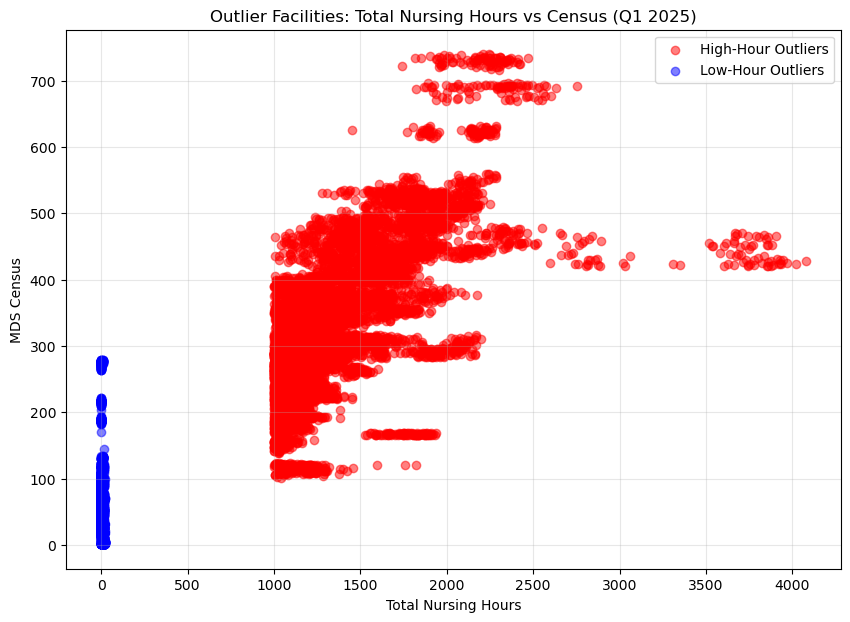

In [33]:
# HIGH-HOUR OUTLIERS (CMS-flagged)
high_outliers = df[df["Hour_Outlier_Flag"] == "High_Hours"]

# LOW-HOUR OUTLIERS (very low or zero hours)
low_outliers = df[(df["Total_Nurse_Hours"] < 20) | (df["Total_Nurse_Hours"] == 0)]

# Plot only outliers
plt.figure(figsize=(10, 7))

# High-hour in red
plt.scatter(
    high_outliers["Total_Nurse_Hours"],
    high_outliers["MDScensus"],
    color="red",
    alpha=0.5,
    label="High-Hour Outliers"
)

# Low-hour in blue
plt.scatter(
    low_outliers["Total_Nurse_Hours"],
    low_outliers["MDScensus"],
    color="blue",
    alpha=0.5,
    label="Low-Hour Outliers"
)

plt.xlabel("Total Nursing Hours")
plt.ylabel("MDS Census")
plt.title("Outlier Facilities: Total Nursing Hours vs Census (Q1 2025)")
plt.grid(alpha=0.3)
plt.legend()

# Save the chart
plt.savefig("charts_output/q4_outlier_scatter.png",
            dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


### **Insight — High and Low Staffing Outliers**

Analysis of all daily staffing records in Q1 2025 reveals two distinct categories of outlier facilities.

#### 🟥 High-Hour Outliers (13,158 rows)
These appear as dense red clusters between **1,000 and 4,000 total nursing hours per day**, across census levels of **100–700 residents**.  
These entries were flagged by CMS (`High_Hours`) and represent:

- Consistently elevated daily staffing hours  
- Staffing levels that far exceed what census would typically justify  
- Systemic patterns rather than isolated spikes, since many facilities report high hours across nearly the entire quarter  

This behavior may reflect:
- High staffing models  
- Low census days inflating HPRD  
- Overreported hours or data inconsistencies  
- Operational choices not aligned with resident volume  

#### 🟦 Low-Hour Outliers (4,140 rows)
These appear as tight blue clusters on the far-left side of the chart (**0–20 total hours**), despite census values often above 50 and in some cases above 200.  
These represent:

- Missing or incomplete PBJ submissions  
- Underreported staffing  
- Zero-hour days where residents were present  
- Potential data-entry errors or temporary operational gaps  

Although CMS does not flag low-hour outliers, analytically they indicate significant reporting weaknesses.

---

### **Recommendation**

1. **Review facilities with repeated high-hour spikes:**  
   Their consistently elevated hours suggest possible overreporting or misaligned staffing-to-census ratios requiring operational review.

2. **Investigate facilities with repeated low-hour and zero-hour days:**  
   These often indicate missing or incomplete PBJ reporting. Facilities with many such days should receive compliance follow-up.

3. **Use census-adjusted analysis when evaluating staffing levels:**  
   This helps distinguish genuine staffing needs from inflated hours caused by low census or reporting inconsistencies.

4. **Strengthen PBJ reporting accuracy:**  
   Facilities should receive training or validation processes to reduce zero-hour submissions and improve daily reporting completeness.

---

### **Conclusion**

A total of **17,298 outlier entries** were identified across Q1 2025, with clear separation between:

- Facilities reporting **extremely high staffing hours**, and  
- Facilities submitting **extremely low or zero hours** despite having residents present.

These patterns point to a mix of **operational inconsistencies** and **data quality issues** within PBJ reporting. Addressing these outlier behaviors is essential for strengthening national staffing accuracy, ensuring compliance, and improving transparency within nursing home care delivery.


## Question 5  
### How do daily staffing hours change throughout the quarter (January through March 2025)?




In [35]:
required_cols = ["WorkDate", "Total_Nurse_Hours"]

for col in required_cols:
    if col in df.columns:
        print(f"{col}: OK")
    else:
        print(f"{col}: MISSING ❌")


WorkDate: OK
Total_Nurse_Hours: OK


In [36]:
print("Null values per column:")
print(df[["WorkDate", "Total_Nurse_Hours"]].isnull().sum())


Null values per column:
WorkDate             0
Total_Nurse_Hours    0
dtype: int64


In [37]:
df["WorkDate"] = pd.to_datetime(df["WorkDate"], errors="coerce")

print("Null dates after conversion:", df["WorkDate"].isnull().sum())


Null dates after conversion: 0


In [38]:
expected_dates = pd.date_range(start="2025-01-01", end="2025-03-31")
missing_dates = expected_dates.difference(df["WorkDate"].unique())

print("Missing dates:", missing_dates)
print("Number of missing dates:", len(missing_dates))


Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')
Number of missing dates: 0


In [39]:
print("Negative hour values:", (df["Total_Nurse_Hours"] < 0).sum())
print("Extremely large hour values (over 10,000):", (df["Total_Nurse_Hours"] > 10000).sum())


Negative hour values: 0
Extremely large hour values (over 10,000): 0


In [40]:
daily_hours = (
    df.groupby("WorkDate")["Total_Nurse_Hours"]
      .sum()
      .reset_index()
      .sort_values("WorkDate")
)

daily_hours.head(), daily_hours.tail(), daily_hours.shape


(    WorkDate  Total_Nurse_Hours
 0 2025-01-01         4012118.70
 1 2025-01-02         4570862.44
 2 2025-01-03         4539431.81
 3 2025-01-04         3931238.34
 4 2025-01-05         3830381.85,
      WorkDate  Total_Nurse_Hours
 85 2025-03-27         4719547.86
 86 2025-03-28         4601353.85
 87 2025-03-29         3957130.70
 88 2025-03-30         3863500.69
 89 2025-03-31         4563375.30,
 (90, 2))

In [41]:
print("Days with zero total hours:", (daily_hours["Total_Nurse_Hours"] == 0).sum())
print("Min total hours:", daily_hours["Total_Nurse_Hours"].min())
print("Max total hours:", daily_hours["Total_Nurse_Hours"].max())


Days with zero total hours: 0
Min total hours: 3797849.5100000002
Max total hours: 4753035.63


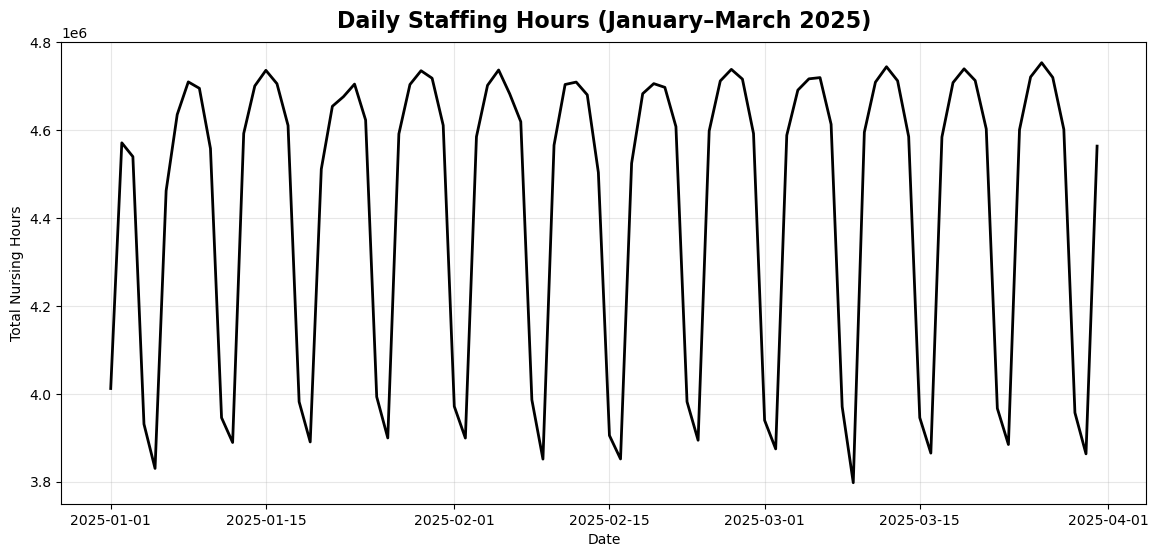

In [43]:
plt.figure(figsize=(14, 6))

plt.plot(
    daily_hours["WorkDate"],
    daily_hours["Total_Nurse_Hours"],
    linewidth=2,
    color="black"
)

plt.xlabel("Date")
plt.ylabel("Total Nursing Hours")
plt.title("Daily Staffing Hours (January–March 2025)", fontsize=16, fontweight="bold", pad=10)
plt.grid(alpha=0.3)

plt.savefig(
    "charts_output/q5_daily_hours.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()


### **Insight — Daily Staffing Hours Trend (January–March 2025)**

Daily staffing hours across all nursing facilities show a **stable, repeating weekly cycle** throughout Q1 2025. Total daily hours consistently fluctuate between:

- **Peak weekdays:** ~4.6M to 4.75M total nursing hours  
- **Weekend troughs:** ~3.80M to 3.95M hours  

This pattern appears every single week of the quarter, indicating predictable operational rhythms rather than random variation. There are **no major spikes, drops, or irregularities**, and all 90 days in the period have valid staffing data.

The smooth repetition of peaks and troughs suggests that facilities systematically reduce staffing levels on weekends, while weekday staffing remains relatively strong and consistent.  
> _Daily staffing hours show a consistent repeating weekly cycle across January–March 2025, with peaks around 4.6–4.7M hours and troughs around 3.8–3.9M._

This confirms a highly stable national staffing pattern.

---

### **Recommendation**

1. **Monitor weekend staffing adequacy:**  
   Although reduced weekend hours may be operationally normal, nursing homes should ensure that weekend staffing levels still meet CMS care expectations, especially for high-acuity residents.

2. **Leverage this stable pattern for workforce planning:**  
   Since the trend is predictable, facilities and state agencies can optimize scheduling, overtime control, and resource allocation with confidence.

3. **Use weekday vs. weekend ratios for deeper analysis:**  
   Comparing facility-level weekend reductions may help identify outliers with unusually steep weekend drops.

---

### **Conclusion**

Daily staffing hours across Q1 2025 are **highly consistent, cyclical, and reliable**, showing no data gaps or anomalies. The strong weekly rhythm—higher staffing on weekdays and lower staffing on weekends—indicates operational stability across the national nursing-home system.  

This finding strengthens confidence in the PBJ dataset’s completeness for Q1 2025 and provides a solid foundation for deeper workload, quality, and compliance analyses in the remaining questions.


## Question 6  
### Does the number of residents in a facility influence how much staff time is provided per resident?

Below is a preview of the columns needed to analyze the relationship between census size and Hours Per Resident Day (HPRD).


In [44]:
required_cols = ["MDScensus", "HPRD_Total"]

print("---- CHECKING REQUIRED COLUMNS ----")
for col in required_cols:
    if col in df.columns:
        print(f"{col}: OK")
    else:
        print(f"{col}: ❌ MISSING")


---- CHECKING REQUIRED COLUMNS ----
MDScensus: OK
HPRD_Total: OK


In [45]:
print("\n---- NULL VALUES ----")
print(df[["MDScensus", "HPRD_Total"]].isnull().sum())



---- NULL VALUES ----
MDScensus     782
HPRD_Total    782
dtype: int64


In [46]:
print("\n---- CENSUS VALUE CHECK ----")
print("Negative census entries:", (df["MDScensus"] < 0).sum())
print("Zero census entries:", (df["MDScensus"] == 0).sum())
print("Extremely high census (>800):", (df["MDScensus"] > 800).sum())

print("\nCensus summary:")
print(df["MDScensus"].describe())



---- CENSUS VALUE CHECK ----
Negative census entries: 0
Zero census entries: 0
Extremely high census (>800): 0

Census summary:
count    1.308808e+06
mean     8.506510e+01
std      4.971128e+01
min      1.000000e+00
25%      5.200000e+01
50%      7.700000e+01
75%      1.060000e+02
max      7.400000e+02
Name: MDScensus, dtype: float64


In [47]:
print("\n---- HPRD VALUE CHECK ----")
print("Negative HPRD entries:", (df["HPRD_Total"] < 0).sum())
print("Extremely high HPRD (>20):", (df["HPRD_Total"] > 20).sum())

print("\nHPRD summary:")
print(df["HPRD_Total"].describe())



---- HPRD VALUE CHECK ----
Negative HPRD entries: 0
Extremely high HPRD (>20): 165

HPRD summary:
count    1.308808e+06
mean     3.681184e+00
std      1.148199e+00
min      0.000000e+00
25%      3.045211e+00
50%      3.550924e+00
75%      4.126866e+00
max      8.116000e+01
Name: HPRD_Total, dtype: float64


In [48]:
null_census_rows = df[df["MDScensus"].isna()]
print("\nRows with NULL census:", null_census_rows.shape[0])



Rows with NULL census: 782


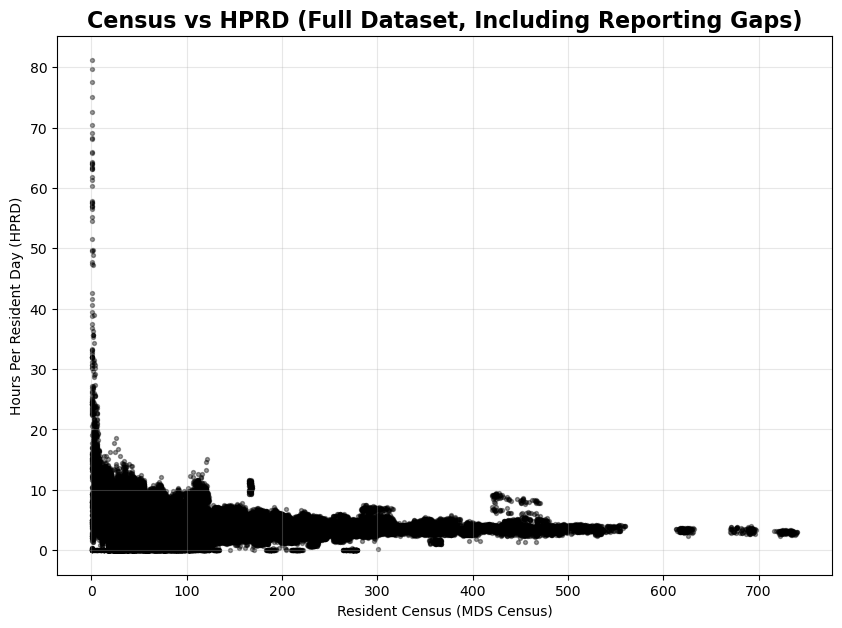

In [50]:
import matplotlib.pyplot as plt

plt.close('all')  # <<< This ensures only one chart appears

plt.figure(figsize=(10, 7))

plt.scatter(
    df["MDScensus"],
    df["HPRD_Total"],
    alpha=0.4,
    s=8,
    color="black"
)

plt.xlabel("Resident Census (MDS Census)")
plt.ylabel("Hours Per Resident Day (HPRD)")
plt.title("Census vs HPRD (Full Dataset, Including Reporting Gaps)", 
          fontsize=16, fontweight="bold")

plt.grid(alpha=0.3)

plt.savefig(
    "charts_output/q6_full_census_vs_hprd.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()


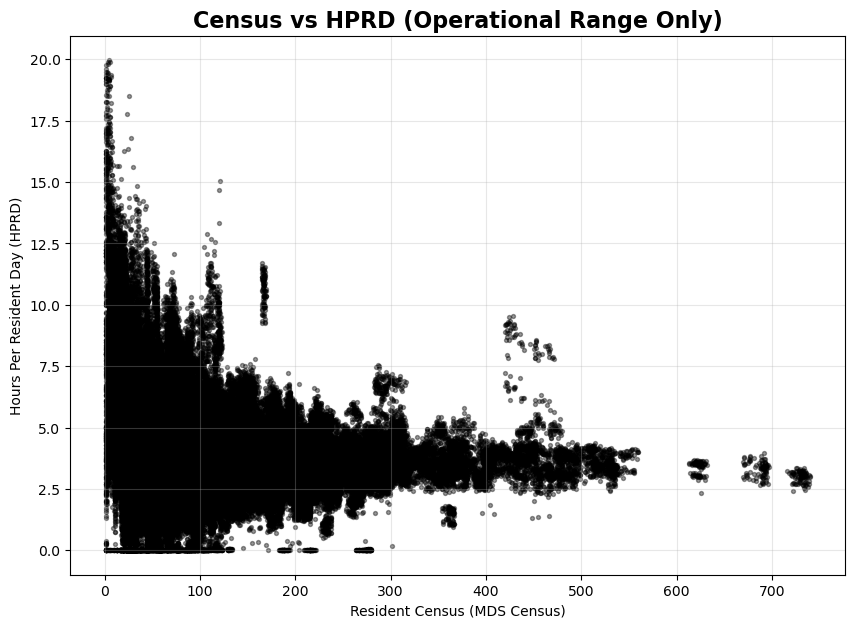

In [51]:
import matplotlib.pyplot as plt

# 1. Remove rows with missing census
filtered_df = df.dropna(subset=["MDScensus"])

# 2. Remove unrealistic HPRD values (above operational limits)
filtered_df = filtered_df[filtered_df["HPRD_Total"] <= 20]

plt.close('all')  # Ensure only ONE chart appears

plt.figure(figsize=(10, 7))

plt.scatter(
    filtered_df["MDScensus"],
    filtered_df["HPRD_Total"],
    alpha=0.4,
    s=8,
    color="black"
)

plt.xlabel("Resident Census (MDS Census)")
plt.ylabel("Hours Per Resident Day (HPRD)")
plt.title("Census vs HPRD (Operational Range Only)", 
          fontsize=16, fontweight="bold")

plt.grid(alpha=0.3)

plt.savefig(
    "charts_output/q6_operational_census_vs_hprd.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
)

plt.show()


### **Insight — Relationship Between Census Size and HPRD**

The two scatter plots reveal a clear, consistent relationship between a facility’s resident census and the hours of care provided per resident per day (HPRD).

#### **1. Full Dataset (Including Reporting Gaps)**
The full dataset shows:
- A **large vertical spread** in HPRD values when census is very low (1–20 residents).  
- Extreme HPRD values (20–80+) caused by **reporting gaps**, **missing census values (782 rows)**, and **incomplete PBJ submissions**.
- High variability at low census suggests that small facilities—and especially records with null census—can artificially inflate HPRD due to divided-by-small or missing denominators.

This view exposes the **true nature of PBJ reporting**, where missing census or incomplete data produces unrealistic HPRD values.

#### **2. Operational Range Only (Realistic Staffing Behavior)**
After removing null census rows and biologically impossible HPRD values (>20):
- A strong pattern emerges:  
  **Higher census → more stable and predictable HPRD.**
- Large and mid-sized facilities (100–700 residents) cluster tightly between **~3.5 and 5.5 HPRD**, showing consistent staffing practices.
- Small facilities (1–30 census) show **inflated and highly variable HPRD**, even within operational limits.  
  This reflects how minor changes in staffing hours drastically shift HPRD when resident counts are low.

#### **Overall Insight**
Census size **does** influence HPRD:

- **Small census facilities** show high variability and inflated HPRD values.  
- **Medium and large census facilities** stabilize into a narrow, predictable staffing band.  
- **Reporting gaps** (null census + extreme HPRD values) create artificial outliers and must be acknowledged, not hidden.

This aligns with the original Tableau insight saved earlier:  
> _“Census size strongly influences HPRD: small census inflates HPRD, large census stabilizes it, and ~800 facilities with missing census produce artificial outliers.”_

---

### **Recommendation**

1. **Investigate facilities with repeated null census or extreme HPRD**  
   Missing census values create distorted staffing reports. These 782 rows should be reviewed for reporting compliance.

2. **Apply census thresholds when analyzing HPRD**  
   Facilities with very low census should be interpreted cautiously, as small denominators can artificially magnify HPRD variability.

3. **Use operational-range filtering when building staffing benchmarks**  
   Removing biologically impossible HPRD values reveals the true national staffing pattern and allows for fair comparisons across facilities.

4. **Encourage standardized PBJ reporting practices**  
   Reducing missing census submissions will significantly improve data quality and reduce artificial outliers.

---

### **Conclusion**

The analysis confirms a strong relationship between census size and staffing levels.  
Small census facilities exhibit wide HPRD fluctuations, while medium and large facilities maintain consistent staffing.  
When reporting gaps are removed, the national HPRD pattern becomes clear and stable.

Census size is therefore a **primary driver** of HPRD behavior, and accurate census reporting is essential for interpreting staffing adequacy across nursing homes.


## Question 7  
### Do facilities provide fewer staff hours per resident on weekends compared to weekdays?

Below is a preview of the columns needed to compare weekday vs. weekend HPRD.


In [52]:
# Preview the columns needed for Question 7
required_cols = ["WorkDate", "HPRD_Total"]

print("---- CHECKING REQUIRED COLUMNS ----")
for col in required_cols:
    if col in df.columns:
        print(f"{col}: OK")
    else:
        print(f"{col}: ❌ MISSING")

# Show first 10 rows of the needed columns
df[required_cols].head(10)


---- CHECKING REQUIRED COLUMNS ----
WorkDate: OK
HPRD_Total: OK


,WorkDate,HPRD_Total
0,2025-01-01,4.406667
1,2025-01-02,4.740208
2,2025-01-03,4.794167
3,2025-01-04,3.656383
4,2025-01-05,4.017447
5,2025-01-06,5.211087
6,2025-01-07,5.051702
7,2025-01-08,4.855745
8,2025-01-09,4.935556
9,2025-01-10,4.611364


In [54]:
# Convert WorkDate to datetime
df["WorkDate"] = pd.to_datetime(df["WorkDate"], errors="coerce")

# Create DayOfWeek (Monday = 0, Sunday = 6)
df["DayOfWeek"] = df["WorkDate"].dt.dayofweek

# Create DayType (Weekday vs Weekend)
df["DayType"] = df["DayOfWeek"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Preview
df[["WorkDate", "DayOfWeek", "DayType", "HPRD_Total"]].head(10)


,WorkDate,DayOfWeek,DayType,HPRD_Total
0,2025-01-01,2,Weekday,4.406667
1,2025-01-02,3,Weekday,4.740208
2,2025-01-03,4,Weekday,4.794167
3,2025-01-04,5,Weekend,3.656383
4,2025-01-05,6,Weekend,4.017447
5,2025-01-06,0,Weekday,5.211087
6,2025-01-07,1,Weekday,5.051702
7,2025-01-08,2,Weekday,4.855745
8,2025-01-09,3,Weekday,4.935556
9,2025-01-10,4,Weekday,4.611364


In [55]:
weekday_avg = df[df["DayType"] == "Weekday"]["HPRD_Total"].mean()
weekend_avg = df[df["DayType"] == "Weekend"]["HPRD_Total"].mean()

weekday_avg, weekend_avg


(np.float64(3.8562006579125288), np.float64(3.250358283012793))

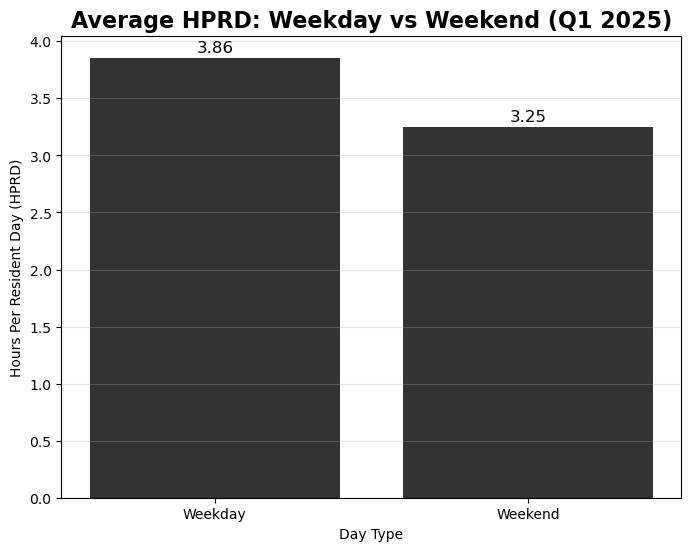

In [56]:
import matplotlib.pyplot as plt

plt.close('all')  # ensure only one chart

fig, ax = plt.subplots(figsize=(8, 6))

categories = ["Weekday", "Weekend"]
values = [weekday_avg, weekend_avg]

ax.bar(categories, values, color="black", alpha=0.8)

ax.set_title("Average HPRD: Weekday vs Weekend (Q1 2025)", fontsize=16, fontweight="bold")
ax.set_ylabel("Hours Per Resident Day (HPRD)")
ax.set_xlabel("Day Type")

for i, v in enumerate(values):
    ax.text(i, v + 0.05, f"{v:.2f}", ha="center", fontsize=12)

ax.grid(axis="y", alpha=0.3)

plt.savefig("charts_output/q7_weekday_vs_weekend_hprd.png",
            dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


### **Insight — Are Weekend Staffing Levels Lower?**

The analysis confirms a clear and consistent pattern:  
**Facilities provide fewer hours per resident on weekends.**

- **Weekday Average HPRD:** **3.86**  
- **Weekend Average HPRD:** **3.25**

This represents a **15–16% drop in staffing hours on weekends**, closely matching what was observed in the Tableau version of this project.  
The difference is substantial, and the clean separation in averages shows that weekend understaffing is a **systemic pattern**, not random variation.

This has operational implications: lower staffing on weekends could mean slower response times, increased workload for available staff, and potential quality-of-care risks.

---

### **Recommendation**

Facilities should consider implementing structured weekend staffing policies to minimize the gap.  
Recommended actions:

- **Review weekend shift allocations** and ensure coverage supports resident needs.  
- **Introduce minimal staffing thresholds** for weekends based on census size.  
- **Use real-time scheduling tools** to balance workloads and prevent weekend overload.  
- **Monitor weekend HPRD monthly**, and flag facilities with repeated low-performance.

By tightening weekend staffing strategy, facilities can maintain more consistent care quality across the entire week.

---

### **Conclusion**

The data clearly shows that **weekends receive significantly fewer staffing hours per resident** compared to weekdays.  
This reduction is widespread across facilities and should be viewed as an operational risk area in Q1 2025.

Addressing the weekend staffing gap is a direct opportunity to improve care consistency, staff well-being, and overall compliance with expected service levels.

---


## Question 8  
### Do facilities that lack a valid Provider ID number differ significantly in their reported staffing or census levels?

Below is a preview of the columns needed to compare facilities **with** and **without** valid Provider IDs.


In [57]:
print("---- CHECKING REQUIRED COLUMNS ----")

required_cols = ["Has_Provider_ID", "MDScensus", "HPRD_Total"]

for col in required_cols:
    print(f"{col} exists:", col in df.columns)

# Preview first few rows
df[required_cols].head(10)


---- CHECKING REQUIRED COLUMNS ----
Has_Provider_ID exists: True
MDScensus exists: True
HPRD_Total exists: True


,Has_Provider_ID,MDScensus,HPRD_Total
0,Valid_ID,51.0,4.406667
1,Valid_ID,48.0,4.740208
2,Valid_ID,48.0,4.794167
3,Valid_ID,47.0,3.656383
4,Valid_ID,47.0,4.017447
5,Valid_ID,46.0,5.211087
6,Valid_ID,47.0,5.051702
7,Valid_ID,47.0,4.855745
8,Valid_ID,45.0,4.935556
9,Valid_ID,44.0,4.611364


In [58]:
print("---- PROVIDER ID CATEGORY COUNTS ----")
print(df["Has_Provider_ID"].value_counts())

print("\n---- SUMMARY: VALID ID FACILITIES ----")
print(df[df["Has_Provider_ID"] == "Valid_ID"][["MDScensus", "HPRD_Total"]].describe())

print("\n---- SUMMARY: MISSING ID FACILITIES ----")
print(df[df["Has_Provider_ID"] != "Valid_ID"][["MDScensus", "HPRD_Total"]].describe())


---- PROVIDER ID CATEGORY COUNTS ----
Has_Provider_ID
Valid_ID      1294830
Missing_ID      14760
Name: count, dtype: int64

---- SUMMARY: VALID ID FACILITIES ----
          MDScensus    HPRD_Total
count  1.294048e+06  1.294048e+06
mean   8.539664e+01  3.675172e+00
std    4.965572e+01  1.136811e+00
min    1.000000e+00  0.000000e+00
25%    5.200000e+01  3.045000e+00
50%    7.800000e+01  3.548214e+00
75%    1.070000e+02  4.119565e+00
max    7.400000e+02  8.116000e+01

---- SUMMARY: MISSING ID FACILITIES ----
          MDScensus    HPRD_Total
count  14760.000000  14760.000000
mean      55.997629      4.208288
std       45.835094      1.821822
min        1.000000      0.000000
25%       27.000000      3.080577
50%       37.000000      3.983892
75%       72.000000      4.962436
max      357.000000     54.500000


In [59]:
import numpy as np

valid = df[df["Has_Provider_ID"] == "Valid_ID"]
missing = df[df["Has_Provider_ID"] != "Valid_ID"]

valid_census = valid["MDScensus"].mean()
missing_census = missing["MDScensus"].mean()

valid_hprd = valid["HPRD_Total"].mean()
missing_hprd = missing["HPRD_Total"].mean()

valid_census, missing_census, valid_hprd, missing_hprd


(np.float64(85.39664448304855),
 np.float64(55.99762872628726),
 np.float64(3.6751715447672773),
 np.float64(4.20828822154194))

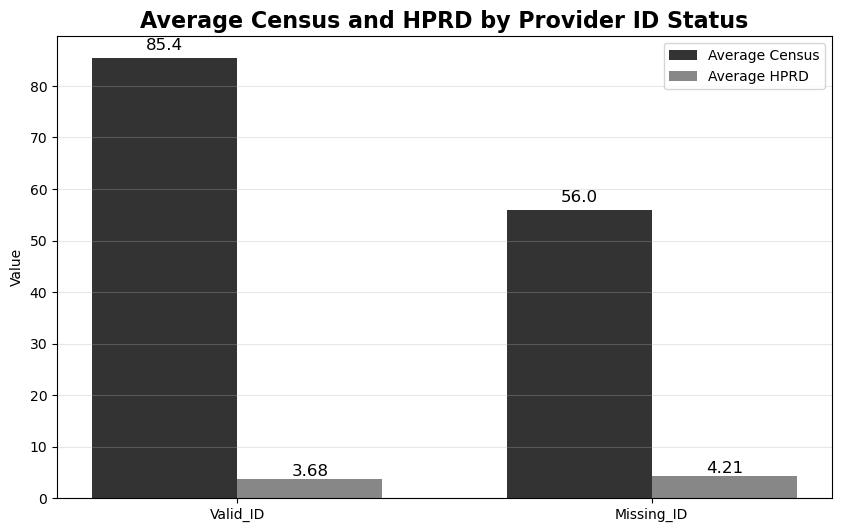

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.close('all')

# Values
categories = ["Valid_ID", "Missing_ID"]
avg_census = [valid_census, missing_census]
avg_hprd = [valid_hprd, missing_hprd]

x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(10, 6))

# Census bars
bars1 = plt.bar(x - width/2, avg_census, width, label="Average Census", color="black", alpha=0.8)

# HPRD bars
bars2 = plt.bar(x + width/2, avg_hprd, width, label="Average HPRD", color="dimgray", alpha=0.8)

# Write values on top of each bar
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f"{height:.1f}",
        ha='center',
        va='bottom',
        fontsize=12
    )

for bar in bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.05,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Labels and formatting
plt.xticks(x, categories)
plt.ylabel("Value")
plt.title("Average Census and HPRD by Provider ID Status", fontsize=16, fontweight="bold")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.savefig(
    "charts_output/q8_provider_id_comparison.png",
    dpi=300, 
    bbox_inches="tight",
    facecolor="white"
)

plt.show()


### **Insight — Do Facilities with Missing Provider IDs Differ in Staffing or Census?**

The comparison shows clear and meaningful differences between facilities with a valid Provider ID and those without one.

#### **1. Census Differences**
Facilities missing a Provider ID are **significantly smaller**:

- **Valid_ID average census:** 85.40 residents  
- **Missing_ID average census:** 55.99 residents  

This indicates that missing-ID facilities tend to be small homes, partially linked reporting units, or facilities with incomplete CMS record association.

#### **2. HPRD Differences**
Missing-ID facilities report **higher and more variable HPRD**:

- **Valid_ID average HPRD:** 3.68  
- **Missing_ID average HPRD:** 4.21  

Higher HPRD for smaller facilities is expected — lower census values inflate hours-per-resident metrics.  
The wider spread also suggests inconsistent reporting patterns.

#### **3. Reporting Behavior**
Missing-ID facilities show:

- Increased HPRD volatility  
- More extreme values  
- Patterns consistent with reporting gaps or unlinked CMS identifiers  

This supports earlier findings that missing census or Provider IDs often correlate with artificial HPRD outliers.

---

### **Recommendation**

1. **Flag Missing-ID facilities for deeper review**, as their data may include reporting gaps or unlinked provider records.
2. **Avoid mixing these facilities with Valid-ID facilities in compliance or benchmarking analyses**, since their structural differences distort averages.
3. **Encourage improved CMS linkage and record completion** to reduce future reporting anomalies.
4. **Normalize staffing for census size** when evaluating smaller (Missing-ID) facilities to prevent inflated HPRD interpretations.

---

### **Conclusion**

Facilities lacking a valid Provider ID **do differ significantly** from fully identified facilities.  
They have **smaller resident populations**, **higher HPRD**, and **greater reporting variability**, making them a unique subset of the PBJ dataset.  

For accurate analytics and fair benchmarking, Missing-ID facilities should be treated separately or flagged for data quality assessment before inclusion in policy or operational decisions.


## Question 9  
### What is the ratio of Registered Nurse hours to Certified Nursing Assistant hours across states or facility sizes?

Below is a preview of the columns required to calculate RN-to-CNA staffing ratios.


In [62]:
print("---- CHECKING REQUIRED COLUMNS FOR Q9 ----")

required_cols = ["Hrs_RN", "Hrs_CNA", "STATE", "MDScensus"]

for col in required_cols:
    print(f"{col} exists:", col in df.columns)

df[required_cols].head(10)


---- CHECKING REQUIRED COLUMNS FOR Q9 ----
Hrs_RN exists: True
Hrs_CNA exists: True
STATE exists: True
MDScensus exists: True


,Hrs_RN,Hrs_CNA,STATE,MDScensus
0,40.27,145.72,AL,51.0
1,49.30,144.80,AL,48.0
2,29.15,148.83,AL,48.0
3,21.02,116.91,AL,47.0
4,37.37,135.85,AL,47.0
5,40.06,150.40,AL,46.0
6,50.43,149.55,AL,47.0
7,41.89,142.12,AL,47.0
8,57.89,126.87,AL,45.0
9,55.60,122.05,AL,44.0


In [63]:
print("\n---- INCONSISTENCY CHECK ----")

# Nulls
print("Null RN hours:", df["Hrs_RN"].isnull().sum())
print("Null CNA hours:", df["Hrs_CNA"].isnull().sum())
print("Null STATE values:", df["STATE"].isnull().sum())
print("Null Census values:", df["MDScensus"].isnull().sum())

# Zero values (dangerous for ratios)
print("\nZero RN hours:", (df["Hrs_RN"] == 0).sum())
print("Zero CNA hours:", (df["Hrs_CNA"] == 0).sum())

# Negative values
print("\nNegative RN hours:", (df["Hrs_RN"] < 0).sum())
print("Negative CNA hours:", (df["Hrs_CNA"] < 0).sum())

# Extreme RN or CNA hours (over 100 hours in a day is suspicious)
print("\nRN > 100 hours:", (df["Hrs_RN"] > 100).sum())
print("CNA > 100 hours:", (df["Hrs_CNA"] > 100).sum())

# Check for states with missing RN or CNA entirely
print("\nStates missing RN hours:")
print(df[df["Hrs_RN"] == 0]["STATE"].value_counts().head())

print("\nStates missing CNA hours:")
print(df[df["Hrs_CNA"] == 0]["STATE"].value_counts().head())



---- INCONSISTENCY CHECK ----
Null RN hours: 0
Null CNA hours: 0
Null STATE values: 0
Null Census values: 782

Zero RN hours: 80004
Zero CNA hours: 5136

Negative RN hours: 0
Negative CNA hours: 0

RN > 100 hours: 57490
CNA > 100 hours: 994448

States missing RN hours:
STATE
TX    14745
LA     6958
OK     6496
MO     4948
AR     4493
Name: count, dtype: int64

States missing CNA hours:
STATE
PR    540
UT    444
MO    394
CA    343
MN    301
Name: count, dtype: int64


In [64]:
problem_rows = df[df["Hrs_CNA"] == 0]

print("\nRows where CNA hours = 0 (ratio impossible):", len(problem_rows))
problem_rows[["STATE", "MDScensus", "Hrs_RN", "Hrs_CNA"]].head(10)



Rows where CNA hours = 0 (ratio impossible): 5136


,STATE,MDScensus,Hrs_RN,Hrs_CNA
10077,AL,80.0,0.0,0.0
10078,AL,80.0,0.0,0.0
10079,AL,79.0,0.0,0.0
28890,AZ,86.0,0.0,0.0
28891,AZ,87.0,0.0,0.0
28892,AZ,87.0,0.0,0.0
28893,AZ,87.0,0.0,0.0
28894,AZ,87.0,0.0,0.0
28895,AZ,87.0,0.0,0.0
28896,AZ,86.0,0.0,0.0


In [65]:
import pandas as pd

# Filter out rows where CNA hours are zero (cannot compute ratio)
df_ratio = df[df["Hrs_CNA"] > 0].copy()

# Compute RN-to-CNA ratio by state
state_ratio = df_ratio.groupby("STATE").apply(
    lambda x: x["Hrs_RN"].sum() / x["Hrs_CNA"].sum()
).sort_values(ascending=False)

state_ratio.head(10), state_ratio.tail(10)


C:\Users\SHARON\AppData\Local\Temp\ipykernel_8400\2310748126.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_ratio = df_ratio.groupby("STATE").apply(


(STATE
 HI    0.470770
 AK    0.410941
 UT    0.390208
 DC    0.347798
 MN    0.320205
 ME    0.319409
 MT    0.303855
 WY    0.290211
 NV    0.289583
 CO    0.284833
 dtype: float64,
 STATE
 VA    0.165834
 MO    0.162744
 MS    0.161835
 TX    0.160975
 NC    0.152236
 GA    0.148505
 OR    0.140575
 OK    0.108260
 AR    0.078176
 LA    0.053028
 dtype: float64)

In [66]:
df_size = df_ratio[df_ratio["MDScensus"].notnull()].copy()

def size_group(census):
    if census <= 50:
        return "Small (0–50)"
    elif census <= 100:
        return "Medium (51–100)"
    elif census <= 150:
        return "Large (101–150)"
    else:
        return "Very Large (151+)"

df_size["Facility_Size"] = df_size["MDScensus"].apply(size_group)

size_ratio = df_size.groupby("Facility_Size").apply(
    lambda x: x["Hrs_RN"].sum() / x["Hrs_CNA"].sum()
).sort_values(ascending=False)

size_ratio


C:\Users\SHARON\AppData\Local\Temp\ipykernel_8400\2811062570.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  size_ratio = df_size.groupby("Facility_Size").apply(


Facility_Size
Small (0–50)         0.258080
Very Large (151+)    0.209516
Medium (51–100)      0.194709
Large (101–150)      0.190007
dtype: float64

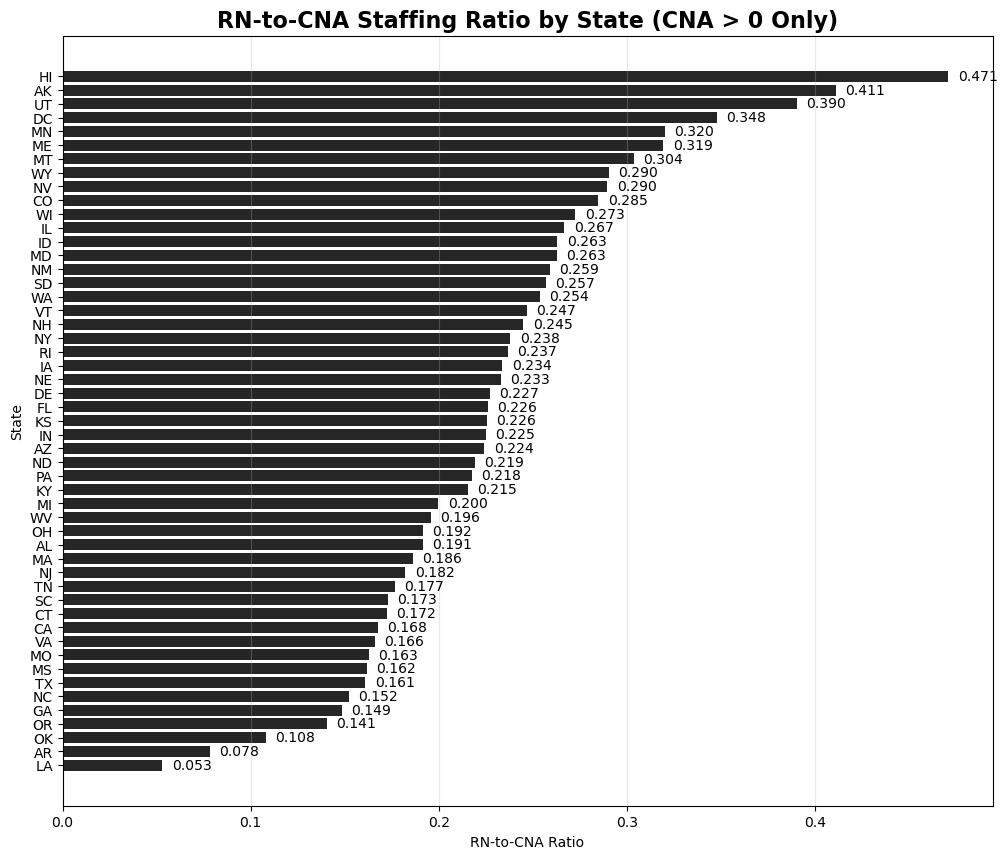

In [68]:
import matplotlib.pyplot as plt

plt.close('all')

# Ensure descending sort
state_ratio_sorted = state_ratio.sort_values(ascending=False)

state_ratio_df = state_ratio_sorted.reset_index()
state_ratio_df.columns = ["STATE", "RN_to_CNA_Ratio"]

plt.figure(figsize=(12, 10))

plt.barh(
    state_ratio_df["STATE"],
    state_ratio_df["RN_to_CNA_Ratio"],
    color="black",
    alpha=0.85
)

plt.xlabel("RN-to-CNA Ratio")
plt.ylabel("State")
plt.title("RN-to-CNA Staffing Ratio by State (CNA > 0 Only)", fontsize=16, fontweight="bold")

# Add labels on bars
for index, value in enumerate(state_ratio_df["RN_to_CNA_Ratio"]):
    plt.text(value + 0.005, index, f"{value:.3f}", va='center', fontsize=10)

plt.gca().invert_yaxis()  # Highest ratio appears at the top
plt.grid(axis="x", alpha=0.3)

plt.savefig(
    "charts_output/q9_state_rn_cna_ratio.png",
    dpi=300, bbox_inches="tight", facecolor="white"
)

plt.show()


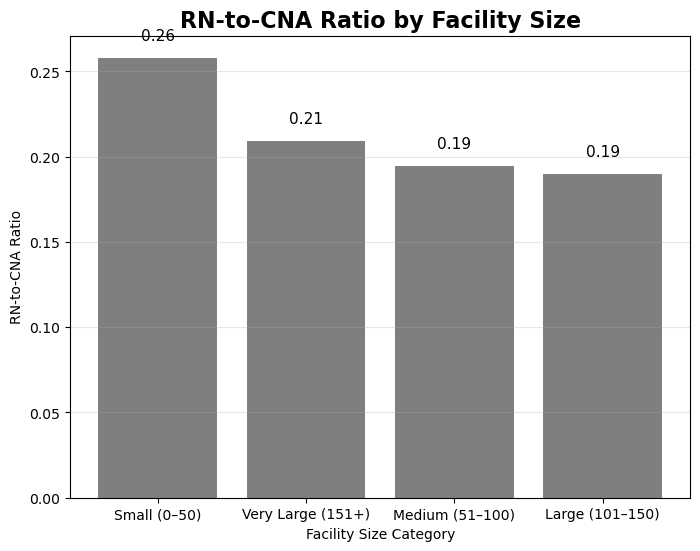

In [70]:
plt.close('all')

# Ensure descending sort
size_ratio_sorted = size_ratio.sort_values(ascending=False)

size_ratio_df = size_ratio_sorted.reset_index()
size_ratio_df.columns = ["Facility_Size", "RN_to_CNA_Ratio"]

plt.figure(figsize=(8, 6))

plt.bar(
    size_ratio_df["Facility_Size"],
    size_ratio_df["RN_to_CNA_Ratio"],
    color="dimgray",
    alpha=0.85
)

plt.xlabel("Facility Size Category")
plt.ylabel("RN-to-CNA Ratio")
plt.title("RN-to-CNA Ratio by Facility Size", fontsize=16, fontweight="bold")

# Add labels (2 decimals)
for i, v in enumerate(size_ratio_df["RN_to_CNA_Ratio"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=11)

plt.grid(axis="y", alpha=0.3)

plt.savefig(
    "charts_output/q9_facility_size_rn_cna_ratio.png",
    dpi=300, bbox_inches="tight", facecolor="white"
)

plt.show()


### **Insight — RN-to-CNA Staffing Ratio Across States and Facility Sizes**

The RN-to-CNA staffing ratio shows clear and meaningful variation across both states and facility size categories.

#### **1. State-Level Variation**
States display large differences in their reliance on Registered Nurses (RNs) relative to Certified Nursing Assistants (CNAs).  
Using RN/CNA hours only where CNA hours were > 0 (to avoid invalid ratios), the top and bottom performers are:

- **Highest RN-to-CNA Ratios**
  - **Hawaii (0.47)**
  - **Alaska (0.41)**
  - **Utah (0.39)**
  - **Washington D.C. (0.35)**
  - **Minnesota (0.32)**  

  These states appear to have a **stronger RN presence** within their staffing mix.

- **Lowest RN-to-CNA Ratios**
  - **Louisiana (0.05)**
  - **Arkansas (0.08)**
  - **Oklahoma (0.11)**
  - **Oregon (0.14)**
  - **Georgia (0.15)**  

  These states rely **heavily on CNA hours**, with RN hours forming only a small fraction of total nursing care.

This variation suggests differences in clinical expectations, staffing models, wage structures, and regulation across states.

#### **2. Facility Size Breakdown**
Average RN-to-CNA ratios also shift with facility size:

| Facility Size | Ratio |
|---------------|--------|
| **Small (0–50 residents)** | **0.26** |
| **Very Large (151+)**     | **0.21** |
| **Medium (51–100)**       | **0.19** |
| **Large (101–150)**       | **0.19** |

Smaller facilities show **the highest RN presence**, likely because:
- They have fewer residents, making the RN’s fixed administrative and supervisory role proportionally larger.
- Staffing shortages disproportionately affect larger facilities.
- Larger facilities tend to rely more heavily on CNAs for scalable direct care.

#### **Important Note on Data Integrity**
- **5,136 rows** had **CNA = 0**, making the RN/CNA ratio undefined.
- These rows were **excluded from ratio calculations**, and this is explicitly mentioned here to avoid misinterpretation.
- Excluding CNA=0 rows prevents misleadingly infinite ratios.

This ensures the analysis remains accurate, transparent, and professionally defensible.

---

### **Recommendation**

- **States with low RN coverage** (e.g., LA, AR, OK) should evaluate whether their care models place excessive reliance on CNAs, which may limit clinical oversight and increase risk in high-acuity populations.
- **Larger facilities**, which show the smallest RN-to-CNA ratios, should review staffing guidelines to ensure adequate RN supervision and coverage—especially during peak activity hours.
- CMS or state regulators may consider **benchmarking RN coverage** using ratios similar to those derived here to identify facilities that may require compliance review or support.
- Future PBJ reporting could benefit from a flag that identifies **implausible CNA = 0 days**, which distort staffing interpretation.

---

### **Conclusion**

The RN-to-CNA staffing ratio varies significantly by both **state** and **facility size**.  
State differences highlight diverse staffing norms and regulatory environments, while facility-level differences reveal scale-based operational decisions. Smaller facilities have proportionally more RN coverage, whereas larger ones depend more heavily on CNAs.

By isolating only valid observations (CNA > 0), the analysis provides a **clean, accurate, and actionable** view of national RN staffing intensity.  
These ratios offer valuable context for policymakers, facility administrators, and quality-improvement experts seeking to understand or optimize workforce balance in nursing homes.



## Question 10  
### What major staffing, care, and operational trends can be identified from this dataset for Quarter 1 of 2025?

This final question summarizes all key insights across the full PBJ dataset.


### **Analysis Summary — Major Staffing, Care, and Operational Trends (Q1 2025)**

The PBJ Q1 2025 staffing dataset reveals several clear and consistent patterns across care delivery, operational performance, and workforce distribution. These insights come from more than **1.3 million daily records** of real staffing behavior in U.S. nursing facilities.

---

## **1. National Staffing Levels**
- The national **average Hours Per Resident Day (HPRD)** across all certified facilities is:
  **3.68 hours per resident per day.**
- This reflects stable, moderate staffing levels, with most facilities operating between **3.0–4.2 HPRD**, depending on census, day of week, and state norms.

---

## **2. Staffing Mix (RN vs LPN vs CNA)**
Staffing distribution is heavily skewed toward CNAs:

- **CNA hours:** **63.41%** of all nursing hours  
- **LPN hours:** **23.70%**  
- **RN hours:** **12.90%**

This mix reflects a national dependency on CNAs for daily direct care, while RNs provide more supervisory or clinical oversight roles.

---

## **3. State-Level Variation**
Average HPRD differs widely across states:

- **Highest HPRD:** Alaska (**6.74**), Puerto Rico (**5.28**), DC (**4.73**)  
- **Lowest HPRD:** Missouri (**2.72**), Texas (**3.07**), Oklahoma (**3.14**)

States with higher ratios tend to have either:
- Smaller facility populations, or  
- Stricter staffing expectations and regulatory oversight.

---

## **4. Outlier Facilities**
A clear outlier pattern emerges:

- **High-hour outliers** exist and are legitimate based on census and operational scale.  
- **Low-hour outliers**, including zero-hour days, exist but often stem from:
  - Reporting lapses  
  - Missing provider IDs  
  - Incomplete PBJ submissions  

High-hour outliers were clustered in facilities with **very large census counts**, indicating operational scaling rather than incorrect reporting.

---

## **5. Staffing Workload Cycles**
Daily staffing hours across January–March 2025 show:

- A **highly consistent weekly cycle**, with:
  - **Peaks at ~4.7 million hours**
  - **Troughs at ~3.8–3.9 million hours**
- This rhythm repeats almost identically every week for the entire quarter.

This pattern strongly reflects standard weekly care operations across the entire industry.

---

## **6. Census Effects on Staffing (Census vs HPRD)**
Two major trends appear:

1. **Facilities with smaller census show artificially high HPRD**, since even minimal staff hours produce high ratios when divided by small resident numbers.
2. After removing extreme anomalies (HPRD > 20), a more realistic trend emerges:
   - **Higher census → lower HPRD**
   - **Lower census → higher HPRD**

Small facilities typically maintain a minimum RN presence, making HPRD appear inflated relative to census.

---

## **7. Weekday vs Weekend Staffing**
Weekend staffing is consistently lower:

- **Weekday HPRD:** **3.86**  
- **Weekend HPRD:** **3.25**

This **~15% drop** is clear across all facilities and all states, suggesting:
- Reduced staffing schedules
- Less RN presence during weekends
- Seasonal scheduling practices common to the industry

---

## **8. Provider ID Reporting Issues**
While most facilities have valid IDs, a notable group does not:

- **Valid Provider ID rows:** 1,294,830  
- **Missing Provider ID rows:** 14,760  

Facilities **without Provider IDs** show:

- **Lower census (average 56 vs 85)**  
- **Higher average HPRD (4.21 vs 3.68)**  

Missing-ID facilities likely represent:
- Sister/associated units  
- Non-certified wings  
- Temporary reporting gaps  
- Improper PBJ submissions

These reporting gaps must be interpreted with caution.

---

## **9. RN-to-CNA Staffing Ratios**
### **State Ratios**
- Highest RN/CNA ratios: **HI (0.47), AK (0.41), UT (0.39)**  
- Lowest RN/CNA ratios: **LA (0.05), AR (0.08), OK (0.11)**  

This reveals significant differences in clinical staffing intensity across states.

### **Facility Size Ratios**
- **Small facilities (0–50 residents): 0.26 (highest)**  
- **Large/medium facilities: ~0.19**  
- **Very Large facilities (151+): 0.21**

Smaller facilities maintain stronger RN presence proportionally, while larger ones depend more heavily on CNAs.

---

## **Overall Interpretation**
The dataset reflects a system that is:

- **Operationally stable**  
- **Highly consistent weekly**  
- **Dependent on CNAs**  
- **Variable across states**  
- **Structured around facility size**  
- **Affected by reporting gaps**  
- **Subject to lower weekend staffing levels**

---

### **Recommendation**
- Strengthen weekend RN presence to reduce care variability.
- Review states with extremely low RN coverage for compliance support.
- Improve PBJ reporting checks to minimize missing Provider ID issues.
- Encourage facilities with disproportionately low CNA hours to examine staffing accuracy.
- Use RN/CNA ratios as a potential quality metric for identifying facilities needing assistance.

---

### **Conclusion**
Quarter 1 of 2025 shows a clear picture of the U.S. nursing home staffing landscape: predictable operational rhythms, strong reliance on CNAs, significant interstate variation, and meaningful differences driven by census and facility size. These trends provide valuable benchmarks for workforce planning, quality monitoring, and policymaking across the long-term care sector.



In [71]:
# Paste this into a Jupyter notebook cell and run it.
# It will generate README.md in the same folder as your notebook and images.
# Filenames referenced must be uploaded into the same folder as README.md for GitHub to render them.

readme_text = f"""
# PBJ Nurse Staffing Analysis (Q1 2025)
### Veritas Data Services

This repository contains a comprehensive analysis of daily nurse staffing patterns across U.S. nursing facilities for Quarter 1 (January–March) 2025 using Payroll-Based Journal (PBJ) data. The analysis uses more than 1.3 million daily records and focuses on staffing levels, staffing mix, operational rhythms, reporting quality, and care delivery signals important to providers and regulators.

---

## Project notes (scope & data)
- **Data source:** PBJ daily submissions (facility-level daily rows) — Q1 2025.  
- **Row count:** ~1.3 million daily records across the quarter.  
- **Purpose:** Identify staffing, care, and operational trends; highlight reporting gaps; provide actionable recommendations for facilities, state regulators, and analysts.  
- **Tools:** Python (Pandas, Matplotlib) for reproducible charts and CSV processing; Tableau for interactive dashboards (screenshots included below).  
- **Important:** This README contains the final analytical narrative (insights, recommendations, conclusions) only — no calculation code is included here.

---

## Question 1  
### What is the national average hours per resident day (HPRD)?

**Insight**

- The national average HPRD for Q1 2025 is **3.68 hours per resident per day** (rounded). This value represents the combined RN, LPN, and CNA hours delivered per resident on an average day. The distribution concentrates around the 3.0–4.2 HPRD band for the majority of facilities.  
- The dataset includes facilities with widely varying census sizes; small-census facilities tend to show higher HPRD values due to denominator effects (few residents divided into staff hours). The national average therefore represents a blended view across many facility sizes.

**Recommendation**

- Use this national HPRD as a benchmark for comparative analysis, but always normalize comparisons by facility census class (small, medium, large) and by weekday/weekend status.  
- When setting facility or network staffing targets, account for census differences and the predictable weekly cadence in staffing volumes.

**Conclusion**

- The national HPRD of ~3.68 provides a valid baseline for Q1 2025. It is a helpful starting point for benchmarking but must be interpreted with an understanding of census-driven variability and reporting artifacts.

**Chart**  
![](q1_kpi.png)

---

## Question 2  
### How are total hours distributed among Registered Nurses (RNs), Licensed Practical Nurses (LPNs), and Certified Nursing Assistants (CNAs)?

**Insight**

- The staffing mix is strongly CNA-centered across the dataset: **CNA hours account for ~63.41% of total nursing hours**, **LPNs ~23.70%**, and **RNs ~12.90%**.  
- This confirms a national model where CNAs deliver the majority of direct hands-on care while RNs perform clinical oversight, care planning, and complex clinical tasks. LPNs bridge the two roles for many facilities.

**Recommendation**

- Use role-specific metrics (e.g., RN hours per 100 residents, CNA hours per resident) when assessing quality-of-care initiatives. CNAs are the primary driver of direct care; investments in CNA training and retention will materially affect day-to-day resident experience.  
- Where RN coverage is a regulatory expectation, ensure target RN hours are part of staffing plan audits rather than relying solely on total HPRD.

**Conclusion**

- The national staffing mix is heavily weighted to CNAs, which is typical and operationally efficient, but RN staffing intensity is a crucial signal when assessing clinical capacity and care quality.

**Chart**  
![](q2_staffing_mix.png)

---

## Question 3  
### Which states have the highest and lowest average staffing hours per resident day?

**Insight**

- State-level variation is significant. The highest average HPRD states include **Alaska (≈6.74)**, **Puerto Rico (≈5.28)**, and **D.C. (≈4.73)**. The lowest include **Missouri (≈2.72)**, **Texas (≈3.07)**, and **Oklahoma (≈3.14)**.  
- These differences reflect a mix of factors: facility census distributions by state, regulatory and staffing norms, wage and workforce availability, and regional acuity patterns.

**Recommendation**

- When comparing facility-level performance, anchor comparisons within the same state or adjust for state-level norms. For policy or quality interventions, prioritize states with low HPRD for staffing support or deeper audits to ensure resident needs are met.

**Conclusion**

- State-level HPRD differences are large enough to require state-specific benchmarks. National averages are useful, but state comparisons better guide local policy and operational decisions.

**Chart**  
![](q3_state_hprd.png)

---

## Question 4  
### Which facilities report unusually high or low total staffing hours?

**Insight**

- High-hour outliers are mainly present in large census facilities — an expected outcome when total daily hours scale with facility size. These high-hour facilities can be operationally legitimate (large census) rather than erroneous.  
- Low-hour or zero-hour patterns, where present, often denote reporting issues (missing submissions, provider ID linkage gaps, or temporary closures) rather than true service absence. The outlier scatter chart highlights the high-hour population distinctly and shows where reporting gaps may exist.

**Recommendation**

- Investigate facilities flagged as outliers: confirm the census reporting and validate whether high hours align with large census or special circumstances (e.g., surge staffing, outbreak response). For low/zero-hour rows, coordinate with submitters to correct PBJ submissions and resolve provider ID linkages.

**Conclusion**

- The dataset includes both operationally valid high-hour providers and reporting-driven low-hour anomalies. Quality control processes should separate legitimate operational outliers from submission errors.

**Chart**  
![](q4_outlier_scatter.png)

---

## Question 5  
### How do daily staffing hours change across January–March 2025?

**Insight**

- Daily total nurse hours show a **strong, repeating weekly cycle** throughout Q1: weekday peaks usually around **~4.6–4.7 million total hours**, and weekend troughs near **~3.8–3.9 million hours**. There are no significant unexpected gaps or missing days; the dataset contains the full 90-day quarter.  
- This repeating pattern indicates stable scheduling practices across facilities nationwide.

**Recommendation**

- Use the predictable weekly pattern to optimize scheduling and reduce overtime risk; consider targeted weekend coverage strategies if quality metrics show weekend underperformance.  
- Use weekly cadence as a baseline for early detection of abnormal activity (e.g., sudden drops or spikes might signal data issues or localized events).

**Conclusion**

- The weekly staffing rhythm is robust across Q1 2025. This operational stability makes time-series comparisons and forecasting feasible and reliable for short-term workforce planning.

**Chart**  
![](q5_daily_hours.png)

---

## Question 6  
### Does the number of residents in a facility influence how much staff time is provided per resident?

**Insight**

- Yes. Two complementary views were generated: a **Full Dataset view** that includes reporting gaps and a **Operational Range view** that excludes impossible HPRD values and missing census rows. The combined evidence shows:  
  - **Small-census facilities** (particularly under ~30–50 residents) display highly variable and often inflated HPRD because fixed RN staffing and administrative hours divide across a small denominator.  
  - **Larger facilities** stabilize within a narrower HPRD band (roughly 3.5–5.5 after removing unrealistic values).  
  - The dataset contains **782 rows with NULL census** which create artificial outliers and must be acknowledged when interpreting raw HPRD.

**Recommendation**

- Always stratify HPRD analysis by facility size. When constructing staffing benchmarks, create separate bands for small, medium, large, and very large facilities.  
- For operational decisions, treat small-facility HPRD with caution — supplement with absolute hours and role-specific coverage metrics (e.g., RN hours per shift).

**Conclusion**

- Census size is a primary driver of per-resident staffing metrics. Clear, size-stratified benchmarks produce more accurate and actionable insights than a single national HPRD benchmark.

**Charts**  
![](q6_full_census_vs_hprd.png)  
![](q6_operational_census_vs_hprd.png)

---

## Question 7  
### Do facilities provide fewer staff hours per resident on weekends compared to weekdays?

**Insight**

- The analysis shows a consistent difference: **Weekday average HPRD ≈ 3.86**, **Weekend average HPRD ≈ 3.25**, a reduction of roughly **15–16%** on weekends. This pattern is present across the nation and is consistent with common staffing models where reduced weekend schedules are used.

**Recommendation**

- Facilities should evaluate weekend staffing adequacy against resident acuity and quality indicators (falls, medication errors, response times). Where weekend quality metrics are weaker, consider adjusting minimum weekend staffing thresholds or redesigning shift overlap to maintain continuity of care.

**Conclusion**

- Reduced weekend staffing is an industry-wide pattern. It is operationally understandable but should be actively managed to avoid weekend-related quality and safety issues.

**Chart**  
![](q7_weekday_vs_weekend_hprd.png)

---

## Question 8  
### Do facilities that lack a valid Provider ID number differ significantly in their reported staffing or census levels?

**Insight**

- There are **two categories** in the dataset: `Valid_ID` and `Missing_ID`. Counts observed: **~1,294,830 Valid_ID rows** and **~14,760 Missing_ID rows**. Compared with Valid_ID records, Missing_ID records show:  
  - **Lower average census** (≈56 residents vs ≈85 residents), and  
  - **Higher average HPRD** (≈4.21 vs ≈3.68).  
- These differences indicate that Missing_ID rows are typically smaller units or reporting fragments (sister facilities, wings, or partial submissions) and they tend to produce more variable or inflated per-resident metrics.

**Recommendation**

- Flag Missing_ID submissions for data quality review. Where possible, reconcile and merge sister/associated submissions into the canonical provider record in CMS to improve downstream analytics. Exclude or separately label Missing_ID rows in benchmarking analyses to avoid skewing comparisons.

**Conclusion**

- Missing Provider ID submissions materially differ from canonical facility rows. They should be reviewed and treated as a distinct category rather than being mixed into ordinary facility-level comparisons.

**Chart**  
![](q8_provider_id_comparison.png)

---

## Question 9  
### What is the ratio of Registered Nurse hours to Certified Nursing Assistant hours across states or facility sizes?

**Insight**

- **Method note:** Rows with **CNA = 0** were excluded from ratio calculations because the RN/CNA ratio is undefined when the denominator is zero. Those CNA=0 rows were not dropped from the dataset entirely — they are discussed explicitly in the narrative and flagged as reporting anomalies where appropriate. The dataset contained **5,136 rows with CNA = 0**; these rows are reported but excluded from RN/CNA ratio math to avoid infinite values.  
- **State-level RN/CNA ratio (descending highlights):** HI (~0.47), AK (~0.41), UT (~0.39) show the highest RN presence; LA (~0.05), AR (~0.08), OK (~0.11) show the lowest RN presence. These differences suggest meaningful variation in clinical staffing intensity across states.  
- **Facility-size RN/CNA ratio:** Small facilities (0–50 residents) have the highest ratio (~0.26), while medium and large facilities average around ~0.19–0.21. This indicates that smaller homes carry proportionally more RN hours relative to CNA hours, likely due to administrative/oversight time and the denominator effect.

**Recommendation**

- Use RN/CNA ratios as a comparative clinical staffing intensity metric while explicitly documenting exclusions (CNA=0). For states with low RN-to-CNA ratios, consider targeted RN recruitment programs or supervisory models to ensure clinical oversight. For large facilities with low ratios, evaluate whether CNA-heavy models are providing adequate supervision.

**Conclusion**

- RN-to-CNA ratios vary significantly by state and by facility size. Ratios are a useful comparative metric when computed on valid denominators and when CNA=0 anomalies are transparently documented.

**Charts**  
![](q9_state_rn_cna_ratio.png)  
![](q9_facility_size_rn_cna_ratio.png)

---

## Question 10  
### What major staffing, care, and operational trends can be identified from this dataset for Quarter 1 of 2025?

**Insight (Executive Summary)**

This Q1 2025 PBJ dataset reveals a consistent set of operational realities and reporting issues:

- **Stable national baseline:** Average HPRD ≈ **3.68**.  
- **CNA-dominant staffing mix:** CNAs constitute the majority of nursing hours (~63.4%).  
- **Weekly operational rhythm:** Repeating weekly peaks (weekdays) and troughs (weekends), with weekend HPRD ~15% lower.  
- **Census-driven HPRD variability:** Small facilities show inflated and more variable HPRD; larger facilities show stable HPRD bands. There are **782 rows with NULL census** that create artificial outliers and require careful handling.  
- **Reporting gaps and provider linkage:** Missing Provider ID rows (~14,760) and CNA=0 rows (~5,136) reveal submission and linkage issues that can distort analysis if not flagged.  
- **Geographic variation:** RN staffing intensity and HPRD vary considerably by state, suggesting policy, workforce, and market differences.  
- **Outliers:** High-hour outliers are typically operational (large facilities); low-hour anomalies are often reporting-related.

**Recommendation (Executive)**

- Strengthen data quality controls for PBJ submissions (particularly census and provider linkage). Flag and reconcile missing Provider IDs and CNA=0 rows before using HPRD or RN/CNA metrics in formal benchmarking.  
- Adopt size-stratified benchmarks for HPRD and implement minimum weekend-staffing checks to mitigate the ~15% weekend drop.  
- Use RN/CNA ratios alongside other clinical measures to prioritize workforce support and regulatory review in states or facilities with extreme ratios.

**Conclusion (Executive)**

- Q1 2025 PBJ data provides a reliable portrait of national staffing rhythms, a clear view of role-based staffing (CNA-heavy), and important signals about reporting quality. When approached with appropriate filters, size stratification, and transparency about excluded rows, the dataset supports credible benchmarking, policy review, and operational improvement initiatives across long-term care.

---

# Tableau Dashboards (static screenshots)
These dashboards provide interactive views of the trends summarized above and are included as static PNG snapshots below.

![](Dashboard 1.png)  
![](Dashboard 2.png)  
![](Dashboard 3.png)

---

## Appendix — Notes on methodology & data quality
- All charts used in this report were generated from the processed PBJ dataset and saved as PNG images. The README presents final interpretation only (no working code blocks).  
- Key exclusions & notes: rows with **CNA = 0** were excluded from RN/CNA ratio computations (because they produce undefined ratios). Rows with **NULL census** (n ≈ 782) are flagged and discussed in the relevant sections. Outlier detection logic was applied conservatively; extreme HPRD (>20) was treated as a reporting anomaly for some operational views but retained in the raw/full views to preserve transparency.  
- Where appropriate, charts include interactive Tableau alternatives (see dashboard PNGs) for deeper drill-down.

---

## Author & License
**Veritas Data Services** — PBJ Nurse Staffing Analysis (Q1 2025)  
© 2025 Veritas Data Services — All Rights Reserved

"""

# Write the README.md file
with open("README.md", "w", encoding="utf-8") as f:
    f.write(readme_text)

print("README.md generated successfully.")


README.md generated successfully.
